<a href="https://colab.research.google.com/github/gabriellysilva-git/Bootcamp_WomakersCode/blob/main/Correla%C3%A7%C3%A3o_e_Regress%C3%A3o_Simples_Multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pésquadrados?

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Carregar os dados
house_data = pd.read_csv('kc_house_data.csv.xls')
car_data = pd.read_csv('car_price.csv.xls')

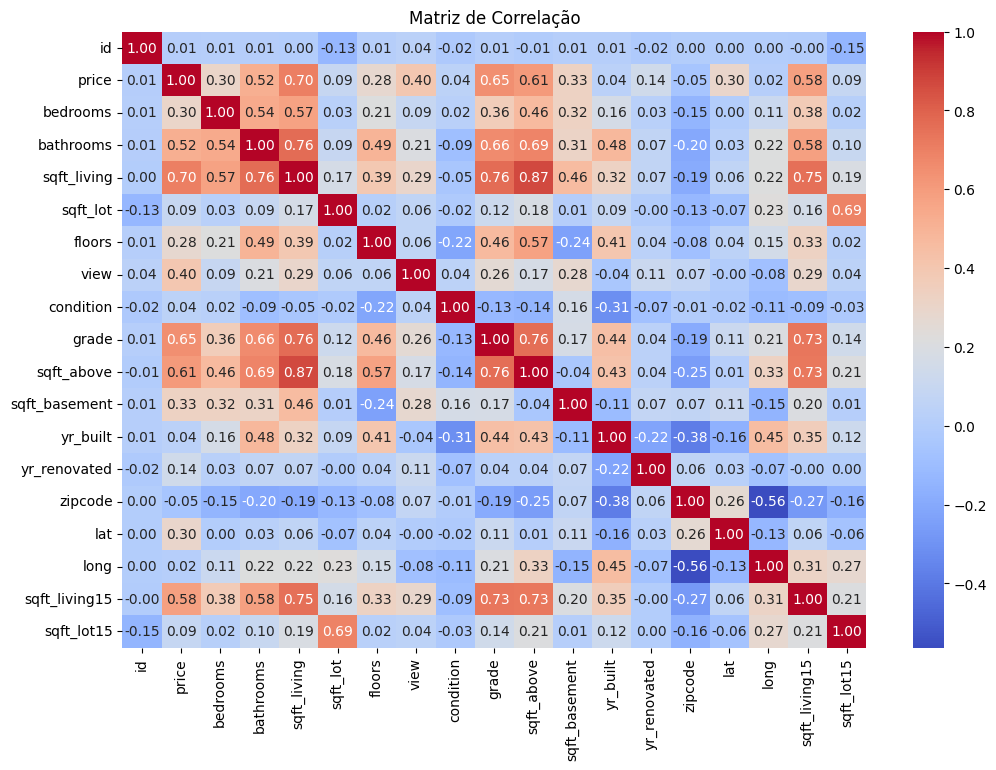

Correlação entre price e bedrooms: 0.299
Correlação para sqft_living > 2000: 0.119


In [22]:
# Selecionar apenas colunas numéricas
numeric_cols = house_data.select_dtypes(include=[np.number]).columns
corr_matrix = house_data[numeric_cols].corr()

# Exibir matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

# Correlação entre price e bedrooms
corr_price_bedrooms = corr_matrix.loc['price', 'bedrooms']
print(f"Correlação entre price e bedrooms: {corr_price_bedrooms:.3f}")

# Correlação para sqft_living > 2000
high_sqft = house_data[house_data['sqft_living'] > 2000]
corr_high_sqft = high_sqft[['price', 'bedrooms']].corr().iloc[0,1]
print(f"Correlação para sqft_living > 2000: {corr_high_sqft:.3f}")

2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?

In [23]:
two_bath = house_data[house_data['bathrooms'] >= 2]
corr_price_sqft = two_bath[['price', 'sqft_living']].corr().iloc[0,1]
print(f"Correlação entre price e sqft_living (≥2 banheiros): {corr_price_sqft:.3f}")

Correlação entre price e sqft_living (≥2 banheiros): 0.707


3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?

<ipython-input-24-41756292ff47>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = bath_groups.apply(lambda x: x[['price', 'sqft_living']].corr().iloc[0,1])


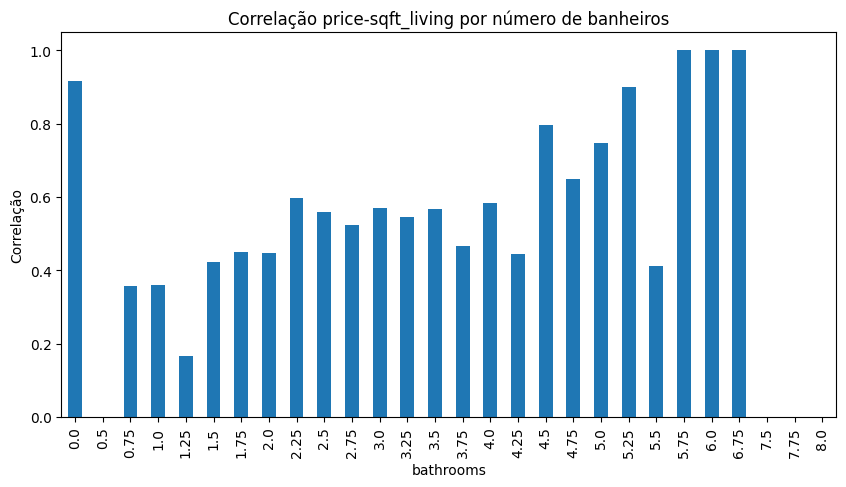

In [24]:
# Agrupar por número de banheiros e calcular correlação
bath_groups = house_data.groupby('bathrooms')
correlations = bath_groups.apply(lambda x: x[['price', 'sqft_living']].corr().iloc[0,1])

plt.figure(figsize=(10, 5))
correlations.plot(kind='bar')
plt.title('Correlação price-sqft_living por número de banheiros')
plt.ylabel('Correlação')
plt.show()

4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pésquadrados?

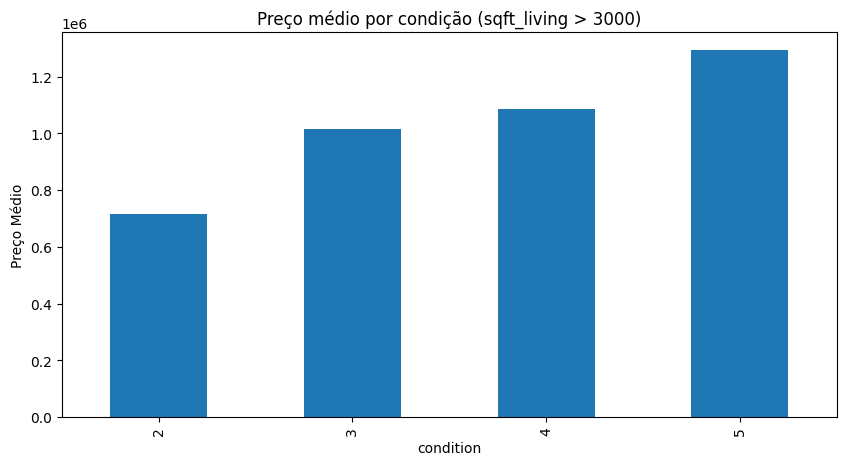

In [25]:
large_houses = house_data[house_data['sqft_living'] > 3000]
condition_price = large_houses.groupby('condition')['price'].mean()

plt.figure(figsize=(10, 5))
condition_price.plot(kind='bar')
plt.title('Preço médio por condição (sqft_living > 3000)')
plt.ylabel('Preço Médio')
plt.show()

5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

In [26]:
three_bed = house_data[house_data['bedrooms'] >= 3]
geo_corr = three_bed[['price', 'lat', 'long']].corr()

print("Correlação entre localização e preço (≥3 quartos):")
print(geo_corr[['lat', 'long']].loc['price'])

Correlação entre localização e preço (≥3 quartos):
lat     0.312555
long   -0.007275
Name: price, dtype: float64


6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.

In [27]:
# ANOVA entre waterfront (categórica) e price (numérica)
model = ols('price ~ C(waterfront)', data=house_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq      df           F         PR(>F)
C(waterfront)  1.250790e+14     1.0  964.573325  2.973808e-202
Residual       1.296339e+15  9997.0         NaN            NaN


7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

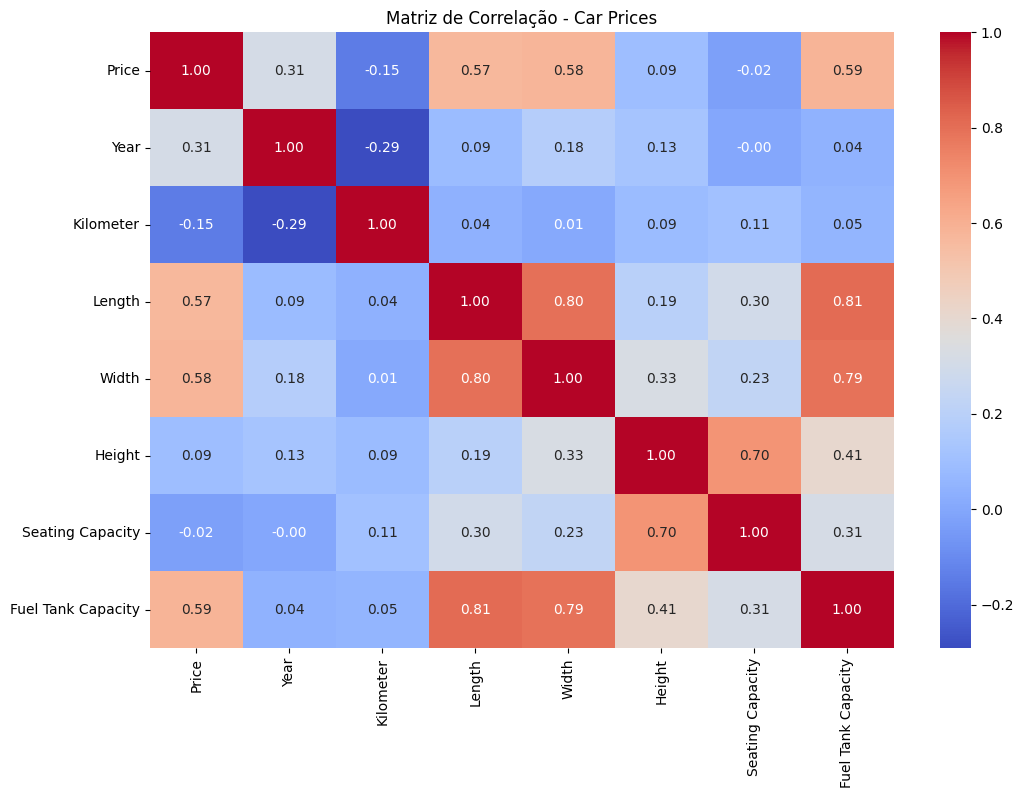


Exemplos de correlações:
Positiva: Price e Year: 0.31
Negativa: Price e Kilometer: -0.15
Neutra: Price e Seating Capacity: -0.02


In [28]:
# Selecionar colunas numéricas
numeric_cols = car_data.select_dtypes(include=[np.number]).columns
car_corr = car_data[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(car_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - Car Prices')
plt.show()

# Exemplos:
print("\nExemplos de correlações:")
print(f"Positiva: Price e Year: {car_corr.loc['Price', 'Year']:.2f}")
print(f"Negativa: Price e Kilometer: {car_corr.loc['Price', 'Kilometer']:.2f}")
print(f"Neutra: Price e Seating Capacity: {car_corr.loc['Price', 'Seating Capacity']:.2f}")

8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.

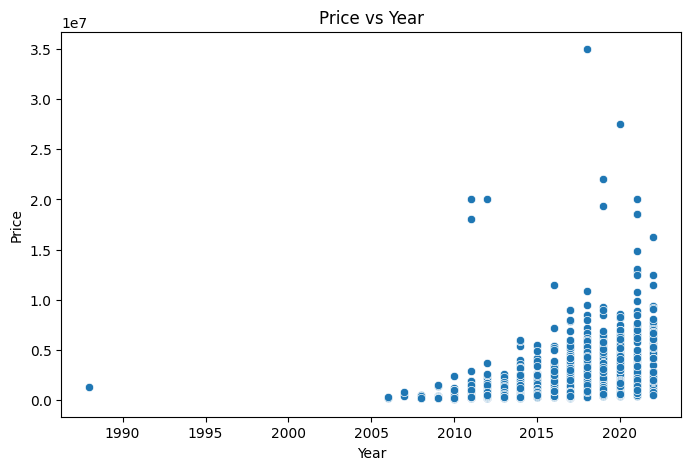

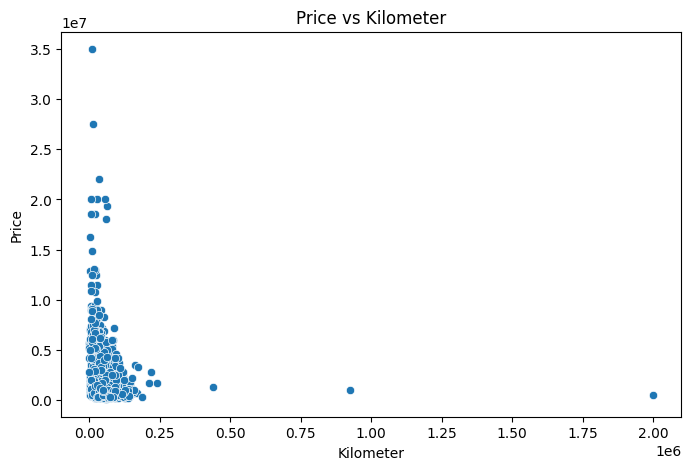

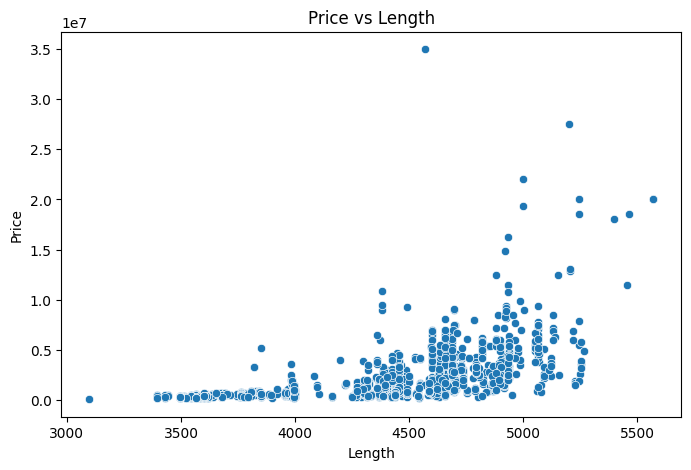

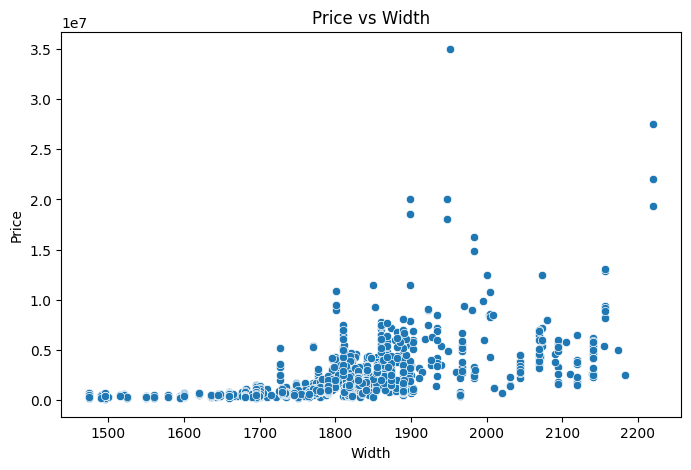

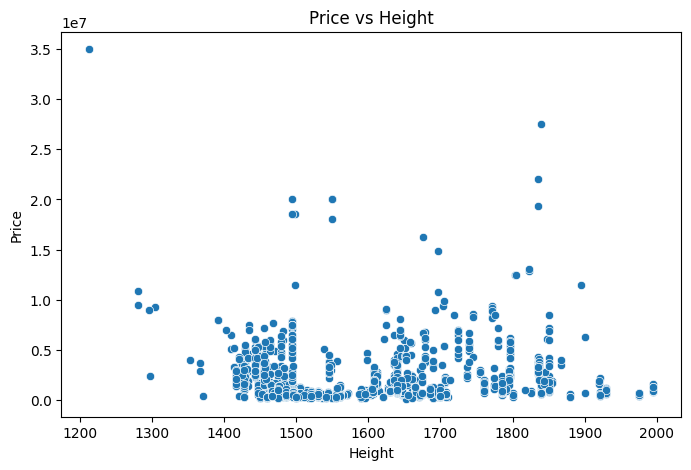

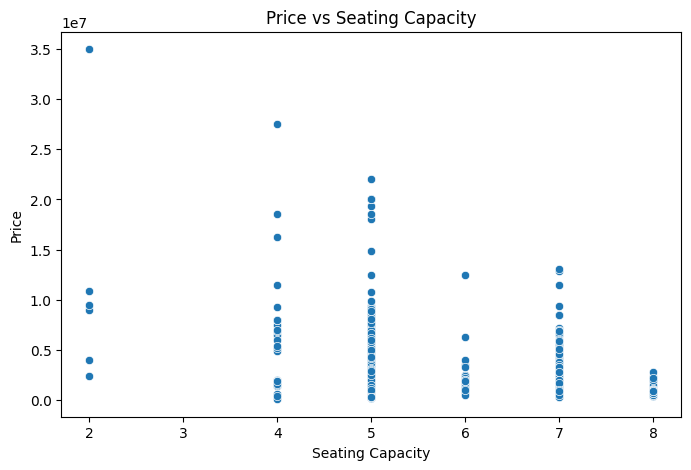

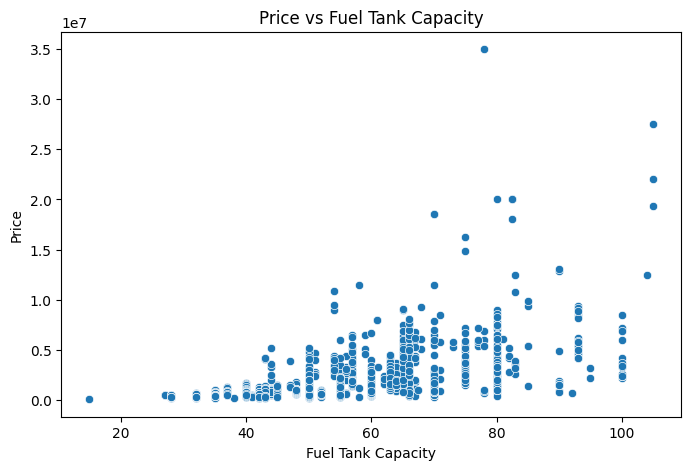

In [29]:
numeric_cols = car_data.select_dtypes(include=[np.number]).columns.drop('Price')

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=col, y='Price', data=car_data)
    plt.title(f'Price vs {col}')
    plt.show()

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     198.1
Date:                Wed, 14 May 2025   Prob (F-statistic):           7.48e-43
Time:                        23:57:56   Log-Likelihood:                -30115.
No. Observations:                1874   AIC:                         6.023e+04
Df Residuals:                    1872   BIC:                         6.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.806e+08   3.43e+07    -14.026      0.0

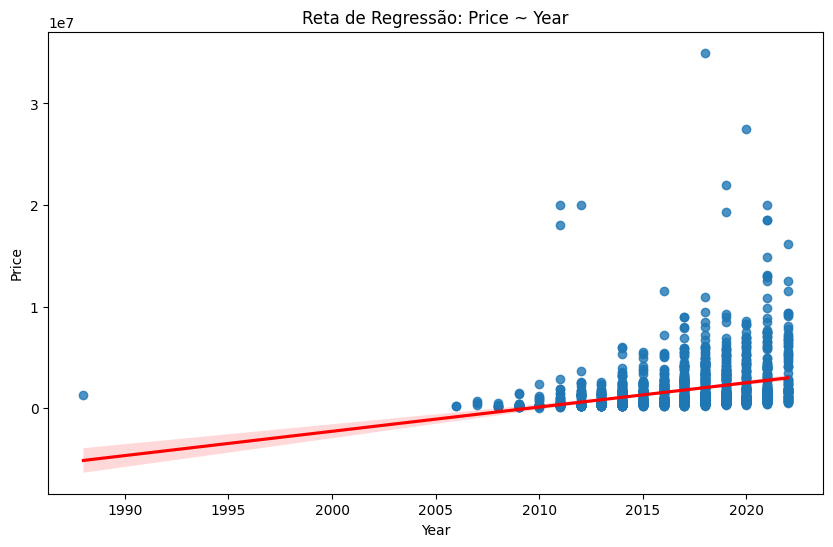

In [30]:
# Vamos usar 'Year' como variável independente para o exemplo
X = car_data['Year']
y = car_data['Price']
X = sm.add_constant(X)  # Adiciona intercepto

model = sm.OLS(y, X).fit()
print(model.summary())

# Plot da reta estimada
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='Price', data=car_data, line_kws={'color': 'red'})
plt.title('Reta de Regressão: Price ~ Year')
plt.show()

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

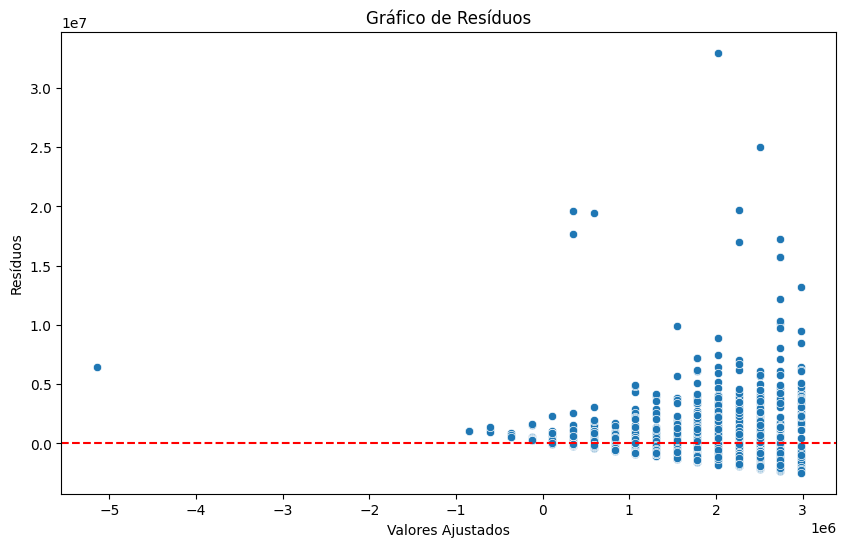

In [31]:
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

Year          int64
Kilometer     int64
Engine       object
Max Power    object
dtype: object
Year         0
Kilometer    0
Engine       0
Max Power    0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     920.2
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        23:59:48   Log-Likelihood:                -29190.
No. Observations:                1874   AIC:                         5.839e+04
Df Residuals:                    1869   BIC:                         5.842e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t

<ipython-input-33-7cd0429ee9af>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data_clean[col].fillna(car_data_clean[col].median(), inplace=True)


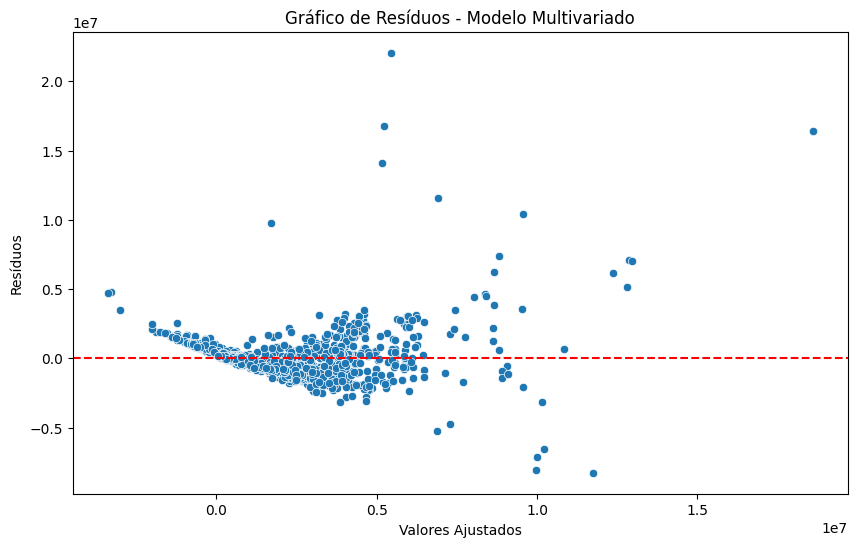

In [33]:
# Primeiro, vamos verificar os tipos de dados das colunas
print(car_data[['Year', 'Kilometer', 'Engine', 'Max Power']].dtypes)

# Se alguma coluna for 'object', precisamos limpar/converter
# Exemplo comum: 'Engine' pode ter valores como "2000 CC" que precisam ser limpos

# Função para limpar colunas numéricas com unidades
def clean_numeric(series):
    return pd.to_numeric(
        series.astype(str).str.replace('[^\d.]', '', regex=True),
        errors='coerce'
    )

# Aplicar a limpeza
car_data_clean = car_data.copy()
car_data_clean['Engine'] = clean_numeric(car_data['Engine'])
car_data_clean['Max Power'] = clean_numeric(car_data['Max Power'])

# Verificar valores nulos após limpeza
print(car_data_clean[['Year', 'Kilometer', 'Engine', 'Max Power']].isnull().sum())

# Tratar valores nulos (por exemplo, preencher com mediana)
for col in ['Engine', 'Max Power']:
    car_data_clean[col].fillna(car_data_clean[col].median(), inplace=True)

# Agora executar a regressão corretamente
X = car_data_clean[['Year', 'Kilometer', 'Engine', 'Max Power']]
X = sm.add_constant(X)  # Adiciona intercepto
y = car_data_clean['Price']

multi_model = sm.OLS(y, X).fit()
print(multi_model.summary())

# Gráfico de resíduos
residuals = multi_model.resid
fitted = multi_model.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Resíduos - Modelo Multivariado')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()